In [244]:
import pandas as pd
import geopandas as gpd

In [245]:

df= pd.read_csv('country_visit_counts.csv')

In [246]:
df

,country,count_visit
0,United States,10
1,Japan,7
2,Russia,7
3,Germany,6
4,United Arab Emirates,6
...,...,...
71,Uganda,1
72,Ghana,1
73,Sweden,1
74,Jordan,1


In [247]:
df.shape

(76, 2)

In [248]:
df = df.sort_values(by='country')


In [249]:
df.country.unique()

array(['Afghanistan', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belgium', 'Bhutan', 'Brazil', 'Brunei', 'Canada', 'China',
       'Croatia', 'Cyprus', 'Denmark', 'Egypt', 'Fiji', 'France',
       'Germany', 'Ghana', 'Greece', 'Guyana', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Maldives',
       'Mauritius', 'Mexico', 'Mongolia', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Netherlands', 'Nigeria', 'Oman', 'Pakistan',
       'Palestine', 'Papua New Guinea', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Russia', 'Rwanda', 'Saudi Arabia',
       'Seychelles', 'Singapore', 'South Africa', 'South Korea', 'Spain',
       'Sri Lanka', 'Sweden', 'Switzerland', 'Tajikistan', 'Tanzania',
       'Thailand', 'Trinidad & Tobago', 'Turkey', 'Turkmenistan',
       'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uzbekista

In [250]:
gdf = gpd.read_file("world_map.geo.json")

In [251]:
gdf = gdf.sort_values(by='sovereignt')


In [252]:
gdf.sovereignt.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bajo Nuevo Bank (Petrel Is.)', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bir Tawil',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brazilian Island', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Cyprus No Mans Area', 'Czechia',
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Federated States of Micronesia', 'Fiji', 'Finland',
       'France', 'Gabon',

In [253]:
gdf = gdf[gdf['sovereignt']!= 'Antarctica']

In [254]:
# Strip and sort
df['country'] = df['country'].str.strip()
gdf['sovereignt'] = gdf['sovereignt'].str.strip()

# Unique values
df_c = set(df['country'].unique())
gdf_c = set(gdf['sovereignt'].unique())


In [255]:
# Districts in df but not in gdf
extra_in_df = df_c - gdf_c
print("Districts in df but not in gdf:", extra_in_df)

# Districts in gdf but not in df
extra_in_gdf = gdf_c - df_c
print("Districts in gdf but not in df:", extra_in_gdf)


Districts in df but not in gdf: {'Palestine', 'United States', 'Tanzania', 'Trinidad & Tobago'}
Districts in gdf but not in df: {'Finland', 'Belize', 'The Bahamas', 'Spratly Islands', 'Guatemala', 'Libya', 'Botswana', 'Jamaica', 'Venezuela', 'Kashmir', 'Guinea', 'Tunisia', 'Vanuatu', 'Iceland', 'Zimbabwe', 'Montenegro', 'Czechia', 'Solomon Islands', 'North Korea', 'Lithuania', 'Georgia', 'Cyprus No Mans Area', 'Haiti', 'Costa Rica', 'Niger', 'Panama', 'United States of America', 'Gambia', 'Malta', 'Federated States of Micronesia', 'Somaliland', 'San Marino', 'Taiwan', 'Saint Lucia', 'Latvia', 'Uruguay', 'Cambodia', 'Democratic Republic of the Congo', 'Western Sahara', 'Benin', 'Antigua and Barbuda', 'Dominica', 'Cuba', 'Grenada', 'Bulgaria', 'Moldova', 'Colombia', 'Paraguay', 'Slovenia', 'Togo', 'Tuvalu', 'Eritrea', 'Angola', 'Brazilian Island', 'Chile', 'Lesotho', 'Central African Republic', 'Lebanon', 'Cabo Verde', 'Bolivia', 'Malawi', 'Peru', 'Northern Cyprus', 'Nicaragua', 'Bahrain

In [256]:
df['country'] = df['country'].replace({
    'United States': 'United States of America',
    'Tanzania': 'United Republic of Tanzania',
    'Trinidad & Tobago': 'Trinidad and Tobago'
})


In [257]:
merged_gdf = gdf.merge(df, how='left', left_on='sovereignt', right_on='country')


In [258]:
merged_gdf['count_visit'] = merged_gdf['count_visit'].fillna(0).astype(int)


In [259]:
merged_gdf.count_visit.unique()

array([ 2,  0,  1,  3,  4,  5,  6,  7, 10])

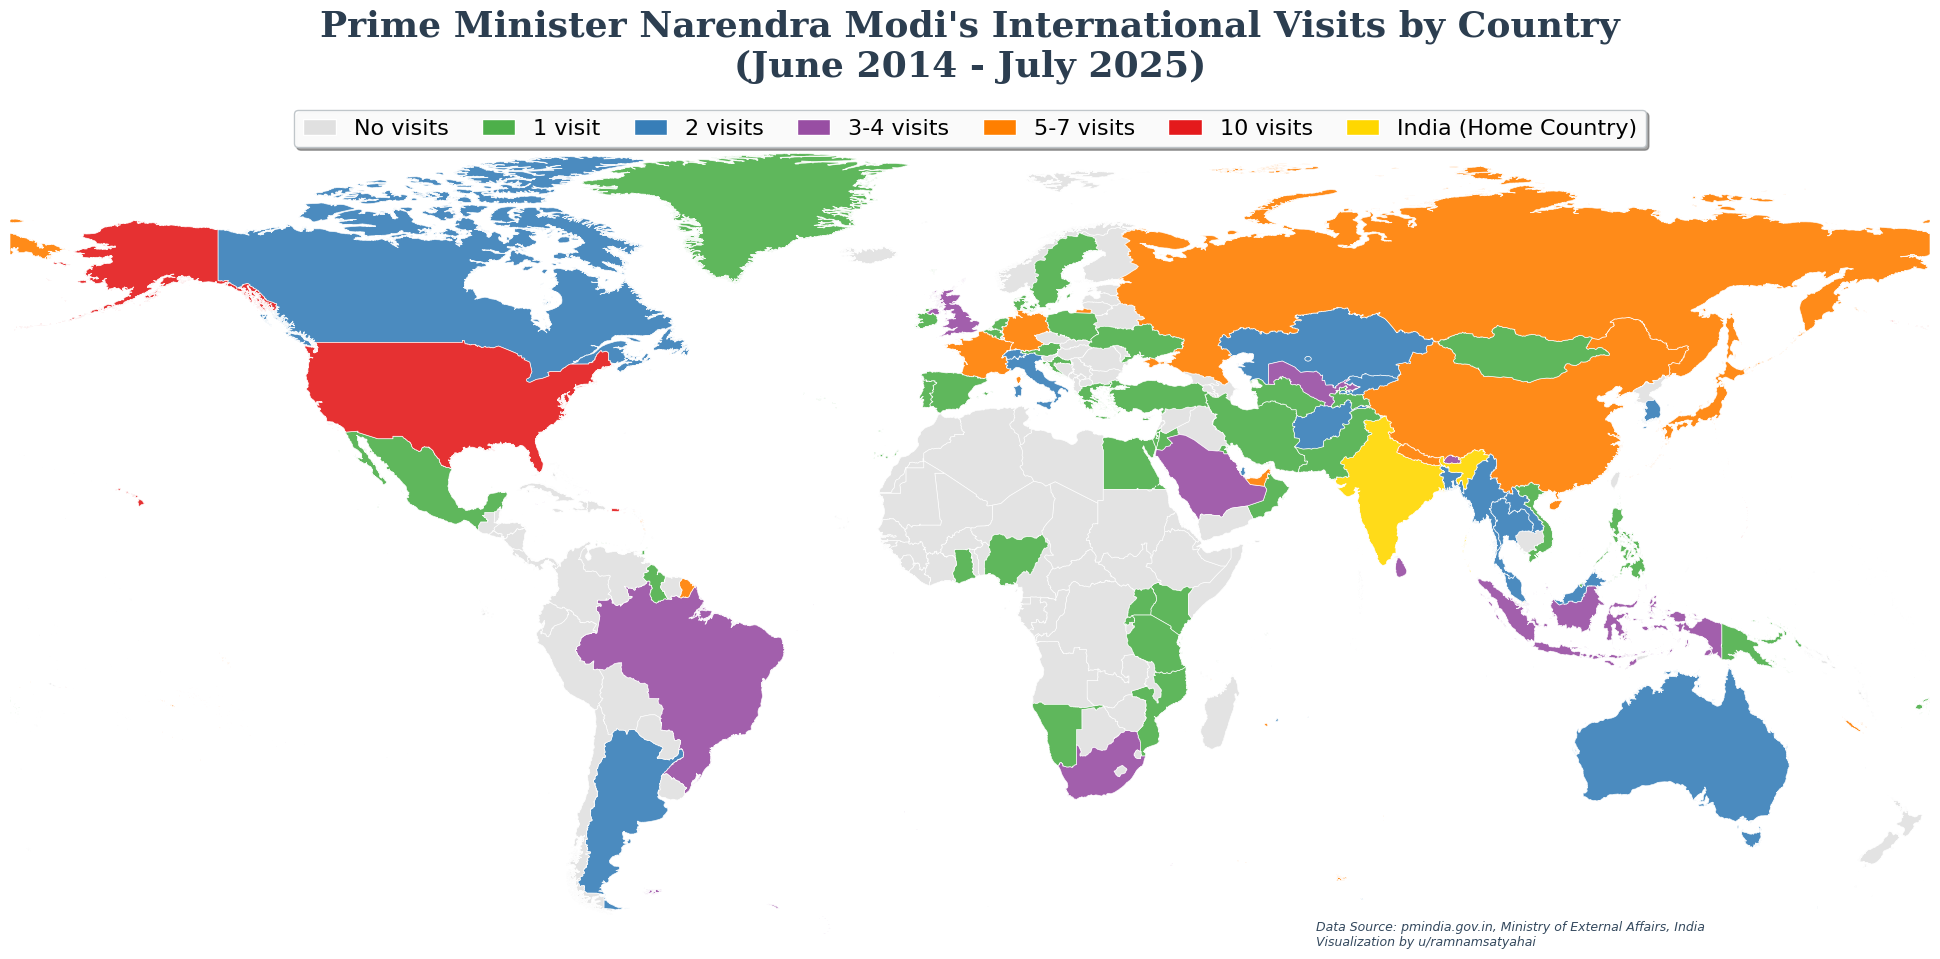

In [260]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

# Define visit bins and labels
visit_counts = [0, 1, 2, 3, 4, 5, 6, 7, 10]
bins = [0, 1, 2, 3, 5, 8, 11]  # Bin edges: 0, 1, 2, 3-4, 5-7, 8+
bin_labels = ['No visits', '1 visit', '2 visits', '3-4 visits', '5-7 visits', '10 visits']

# Create bins for the data
merged_gdf['visit_bins'] = pd.cut(merged_gdf['count_visit'], 
                                  bins=bins, 
                                  labels=bin_labels, 
                                  include_lowest=True, 
                                  right=False)



colors = {
    'No visits': '#e0e0e0',      # Light neutral gray
    '1 visit': '#4daf4a',        # Vibrant green
    '2 visits': '#377eb8',       # Strong blue
    '3-4 visits': '#984ea3',     # Deep purple
    '5-7 visits': '#ff7f00',     # Bright orange
    '10 visits': '#e41a1c',      # Bright red
    'India': '#FFD700'           # Gold for home country
}

# Create color column based on bins
def assign_color(row):
    # Check if this is India using the sovereignt column
    if row['sovereignt'] == 'India':
        return colors['India']
    else:
        return colors[row['visit_bins']]

merged_gdf['plot_color'] = merged_gdf.apply(assign_color, axis=1)

# Create the enhanced plot
plt.style.use('default')
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Plot the map
merged_gdf.plot(ax=ax, 
                color=merged_gdf['plot_color'], 
                edgecolor='white', 
                linewidth=0.5,
                alpha=0.9)

# Customize the plot with serif font
ax.set_title('Prime Minister Narendra Modi\'s International Visits by Country\n(June 2014 - July 2025)', 
             fontsize=26, fontweight='bold', pad=50, color='#2c3e50', fontfamily='serif')

# Remove axes
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 85)
ax.axis('off')

# Create custom legend
legend_elements = []
for label, color in colors.items():
    if label != 'India':  # We'll add India separately
        legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='white', linewidth=1, label=label))

# Add India to legend
legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=colors['India'], edgecolor='white', linewidth=1, label='India (Home Country)'))

# Add horizontal legend below title
legend = ax.legend(handles=legend_elements, 
                  loc='upper center', 
                  bbox_to_anchor=(0.5, 1.06),
                  ncol=len(legend_elements),
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  fontsize=16,
                  columnspacing=1.5,
                  handlelength=1.5)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor('#bdc3c7')
legend.get_frame().set_linewidth(1)

# Add a cool background gradient
ax.set_facecolor('#e8f4f8')  # Light blue-gray background

# Add data source note
ax.text(0.68, 0.02, 'Data Source: pmindia.gov.in, Ministry of External Affairs, India\nVisualization by u/ramnamsatyahai', 
        transform=ax.transAxes, fontsize=9, style='italic',
        verticalalignment='top', color='#34495e', fontweight='light')

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.05, left=0.02, right=0.98)
plt.show()



In [261]:
merged_gdf.columns

Index(['featurecla', 'scalerank', 'labelrank', 'sovereignt', 'sov_a3',
       'adm0_dif', 'level', 'type', 'tlc', 'admin',
       ...
       'fclass_nl', 'fclass_se', 'fclass_bd', 'fclass_ua', 'filename',
       'geometry', 'country', 'count_visit', 'visit_bins', 'plot_color'],
      dtype='object', length=174)

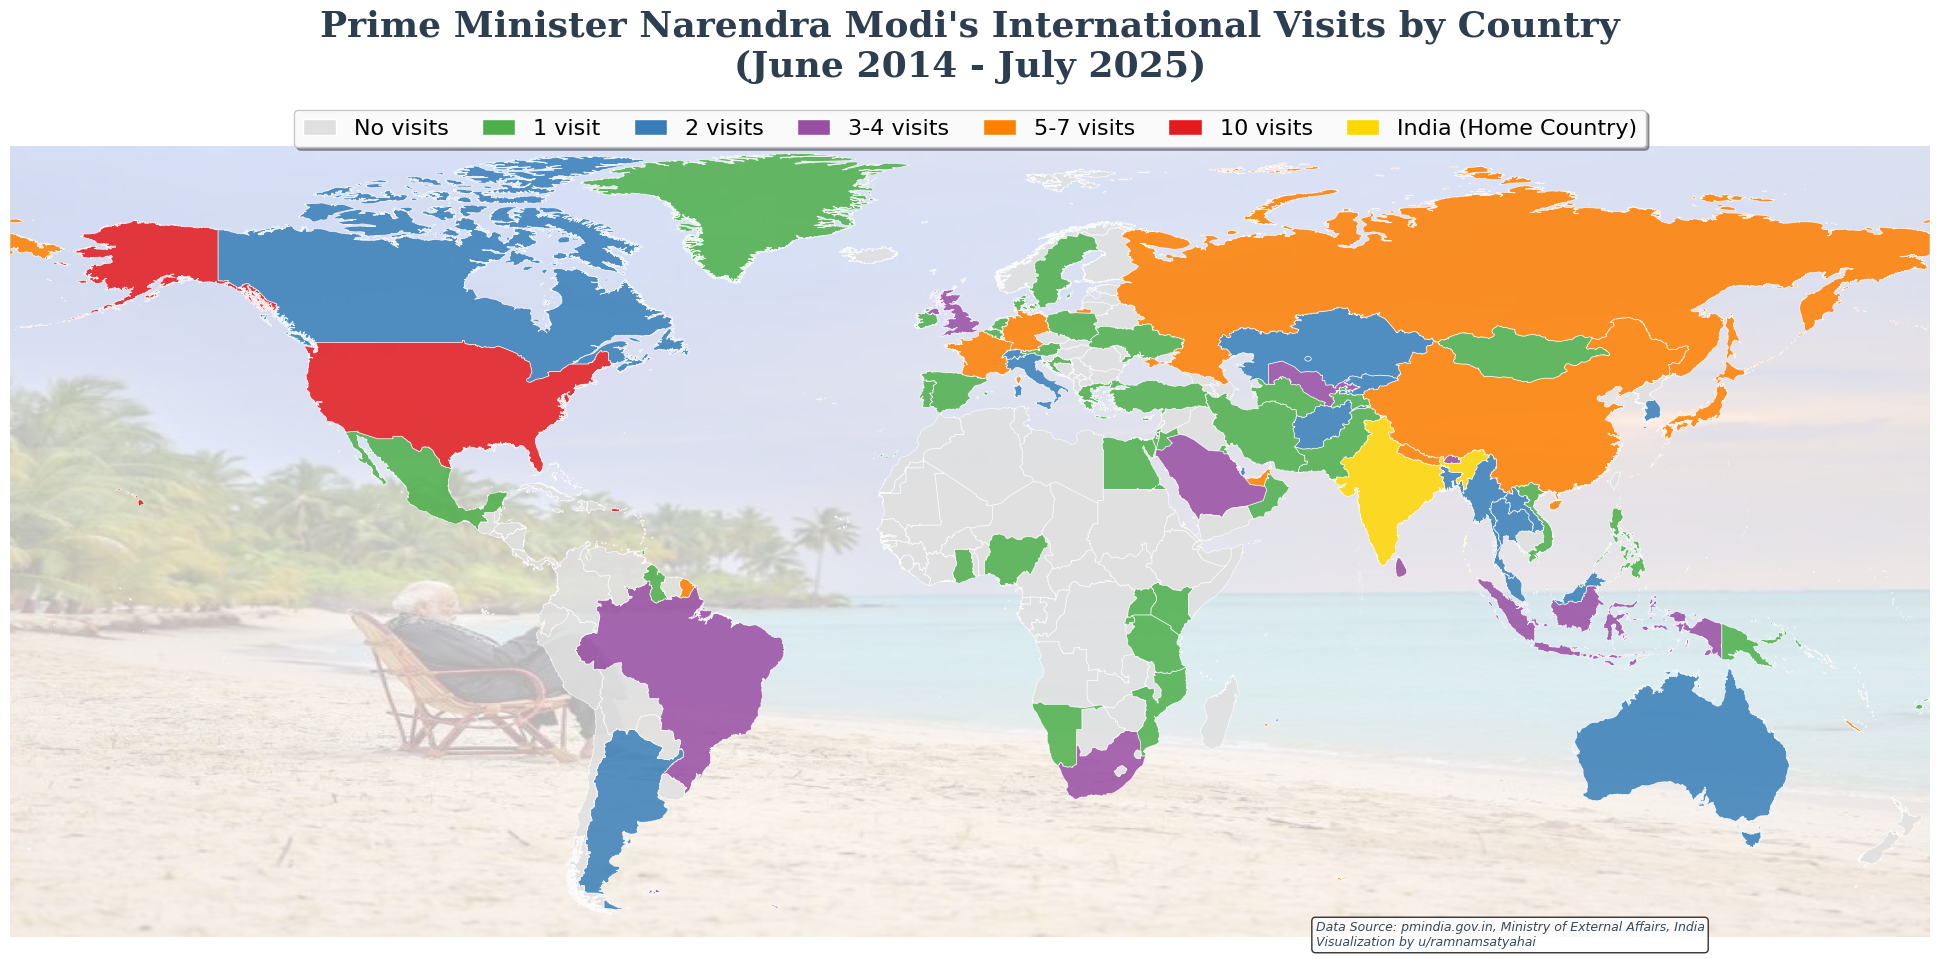

In [262]:
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from matplotlib import image as mpimg

# Define visit bins and labels
visit_counts = [0, 1, 2, 3, 4, 5, 6, 7, 10]
bins = [0, 1, 2, 3, 5, 8, 11]  # Bin edges: 0, 1, 2, 3-4, 5-7, 8+
bin_labels = ['No visits', '1 visit', '2 visits', '3-4 visits', '5-7 visits', '10 visits']

# Create bins for the data
merged_gdf['visit_bins'] = pd.cut(merged_gdf['count_visit'], 
                                  bins=bins, 
                                  labels=bin_labels, 
                                  include_lowest=True, 
                                  right=False)

colors = {
    'No visits': '#e0e0e0',      # Light neutral gray
    '1 visit': '#4daf4a',        # Vibrant green
    '2 visits': '#377eb8',       # Strong blue
    '3-4 visits': '#984ea3',     # Deep purple
    '5-7 visits': '#ff7f00',     # Bright orange
    '10 visits': '#e41a1c',      # Bright red
    'India': '#FFD700'           # Gold for home country
}

# Create color column based on bins
def assign_color(row):
    # Check if this is India using the sovereignt column
    if row['sovereignt'] == 'India':
        return colors['India']
    else:
        return colors[row['visit_bins']]

merged_gdf['plot_color'] = merged_gdf.apply(assign_color, axis=1)

# Create the enhanced plot
plt.style.use('default')
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Load and display the background image
try:
    img = mpimg.imread('image.jpg')
    # Display the image as background, covering the entire axis area
    ax.imshow(img, extent=[-180, 180, -60, 85], aspect='auto', alpha=0.3, zorder=0)
except FileNotFoundError:
    print("Warning: image.jpg not found. Using default background.")
    # Fallback to original background
    ax.set_facecolor('#e8f4f8')  # Light blue-gray background
except Exception as e:
    print(f"Warning: Could not load image.jpg: {e}. Using default background.")
    # Fallback to original background
    ax.set_facecolor('#e8f4f8')  # Light blue-gray background

# Plot the map with slightly higher alpha to stand out against background
merged_gdf.plot(ax=ax, 
                color=merged_gdf['plot_color'], 
                edgecolor='white', 
                linewidth=0.5,
                alpha=0.85,  # Slightly reduced alpha to blend with background
                zorder=1)    # Ensure map is drawn above the background image

# Customize the plot with serif font
ax.set_title('Prime Minister Narendra Modi\'s International Visits by Country\n(June 2014 - July 2025)', 
             fontsize=26, fontweight='bold', pad=50, color='#2c3e50', fontfamily='serif')

# Remove axes
ax.set_xlim(-180, 180)
ax.set_ylim(-60, 85)
ax.axis('off')

# Create custom legend
legend_elements = []
for label, color in colors.items():
    if label != 'India':  # We'll add India separately
        legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=color, edgecolor='white', linewidth=1, label=label))

# Add India to legend
legend_elements.append(plt.Rectangle((0,0),1,1, facecolor=colors['India'], edgecolor='white', linewidth=1, label='India (Home Country)'))

# Add horizontal legend below title
legend = ax.legend(handles=legend_elements, 
                  loc='upper center', 
                  bbox_to_anchor=(0.5, 1.06),
                  ncol=len(legend_elements),
                  frameon=True,
                  fancybox=True,
                  shadow=True,
                  fontsize=16,
                  columnspacing=1.5,
                  handlelength=1.5)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_alpha(0.95)
legend.get_frame().set_edgecolor('#bdc3c7')
legend.get_frame().set_linewidth(1)

# Add data source note with semi-transparent background for better readability
bbox_props = dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8)
ax.text(0.68, 0.02, 'Data Source: pmindia.gov.in, Ministry of External Affairs, India\nVisualization by u/ramnamsatyahai', 
        transform=ax.transAxes, fontsize=9, style='italic',
        verticalalignment='top', color='#34495e', fontweight='light',
        bbox=bbox_props)

plt.tight_layout()
plt.subplots_adjust(top=0.85, bottom=0.05, left=0.02, right=0.98)
# Save the plot
plt.savefig('modi_visits_map.png', dpi=300, bbox_inches='tight', 
           facecolor='white', edgecolor='none', format='png')

plt.show()